In [1]:
#Assignment 2:Part 1
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# sklearn.datasets.make_regression is a function in scikit-learn that generates
# a random regression dataset with specified parameters, such as the number of
# samples, number of features, and level of noise.

X, y = make_regression(n_samples=100, n_features=1, noise=10)

In [9]:
def gradient_descent(X, y, learning_rate, num_iterations):
    # Initialize parameter theta (our weight matrix)
    #Use the np.random.randn function for the same.
    theta = np.random.randn(X.shape[1])

    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        # Calculate predicted values:
        predictions = np.dot(X, theta)

        # Calculate the error: use the mse function
        error = y - predictions

        # Calculate the gradients: 1/m * X.T * error
        gradients = -(1/m) * np.dot(X.T, error)

        # Update parameters: Apply the GD algorithm
        theta -= learning_rate * gradients

        # Calculate the cost function: MSE
        cost =np.sum(error**2)/(m)
        cost_history.append(cost)

    return theta, cost_history


In [12]:
# Set the learning rate and number of iterations
learning_rate =0.001
num_iterations = 10000

# Call the gradient_descent function and store the results
theta, cost_history = gradient_descent(X, y, learning_rate, num_iterations)
print(cost_history[-1])

100.41880995011559


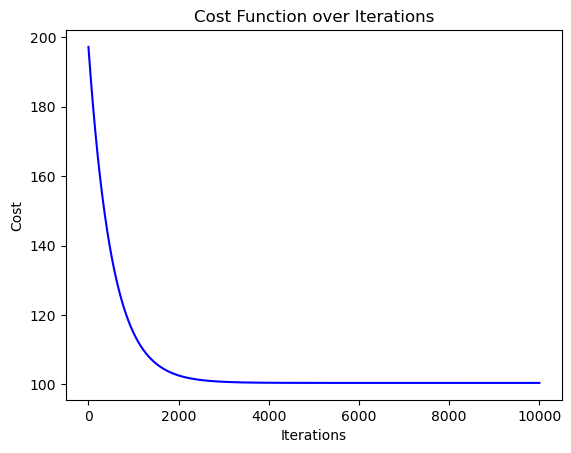

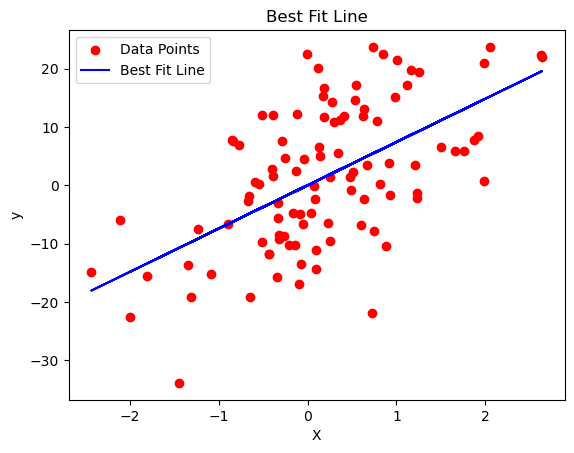

In [16]:
# Plot the cost function over iterations
##iterations = range(1, 10001, 10)
#plt.plot(list(iterations), [cost_history[i-1] for i in iterations])
#plt.xlabel('Iterations')
#plt.ylabel('Cost')
#plt.title('Cost over Iterations')
##plt.show()
plt.plot(range(1,10001), cost_history, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.show()



# Plot the best fit line
plt.scatter(X, y, color='red', label='Data Points')
plt.plot(X, np.dot(X, theta), color='blue', label='Best Fit Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Best Fit Line')
plt.legend()
plt.show()

In [19]:
#Assignment 2:Part 2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
# Generate random classification data using scikit-learn
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

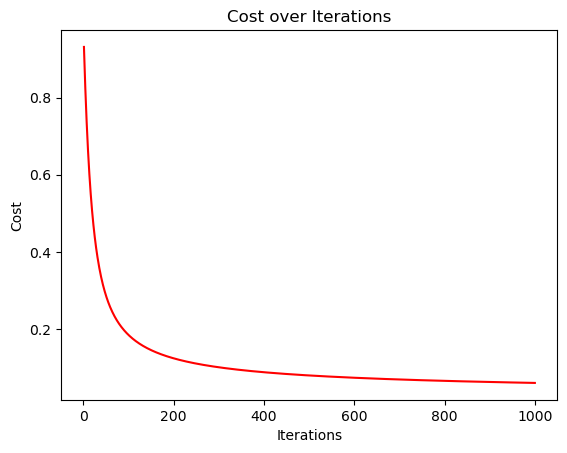

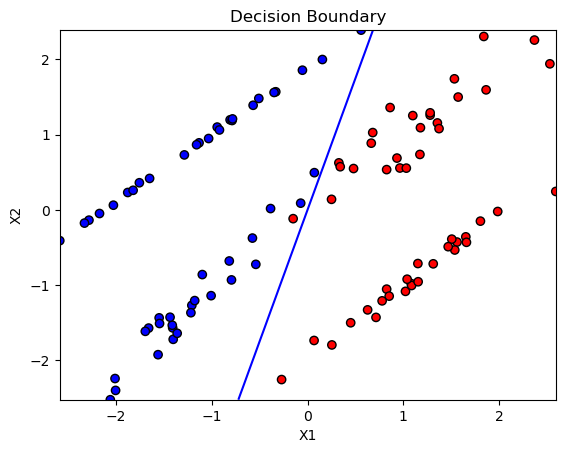

In [22]:
def sigmoid(z):
    # Sigmoid function
    return (1 / (1 + np.exp(-z)))

def logistic_regression(X, y, learning_rate, num_iterations):
    # Initialize parameters: theta
    theta=np.random.randn(2)

    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        # Calculate predicted probabilities using the sigmoid function.
        predictions = sigmoid(np.dot(X, theta))

        # Calculate the error: y_pred - y
        error =predictions - y

        # Calculate the gradients:
        gradients = (1/m) * np.dot(X.T, error)

        # Update parameters:
        theta -= learning_rate * gradients

        # Calculate the cost function: log loss
        cost = -np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions)) / m
        cost_history.append(cost)

    return theta, cost_history


# Set the learning rate and number of iterations
learning_rate = 0.1
num_iterations = 1000

# Call the logistic_regression function and store the results
theta, cost_history = logistic_regression(X, y, learning_rate, num_iterations)

# Plot the cost function over iterations
plt.plot(range(1,1001), cost_history, color='r')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost over Iterations')
plt.show()



# Plot the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = sigmoid(np.dot(grid, theta)).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, levels=[0.5], colors='blue')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Boundary')
plt.show()